In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Аналитик — тестовое задание.xlsx", sheet_name="data")

In [3]:
data['event_date'] = pd.to_datetime(data['event_date'])

In [4]:
data['day_of_week'] = data['event_date'].dt.day_name()

In [5]:
attendance_by_day = data.groupby('day_of_week')['is_attend'].mean().reset_index()

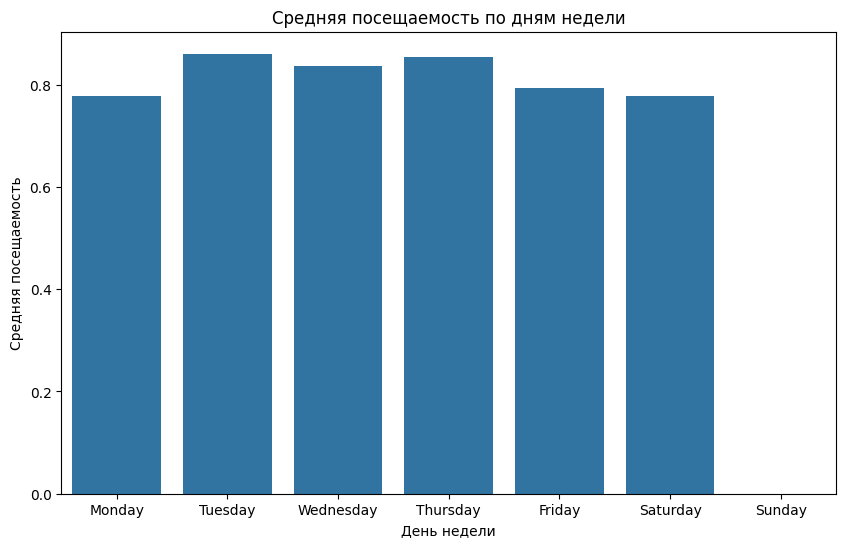

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='is_attend', data=attendance_by_day, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Средняя посещаемость по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя посещаемость')
plt.show()


In [7]:
attendance_by_group = data.groupby('group_ids')['is_attend'].mean().reset_index()

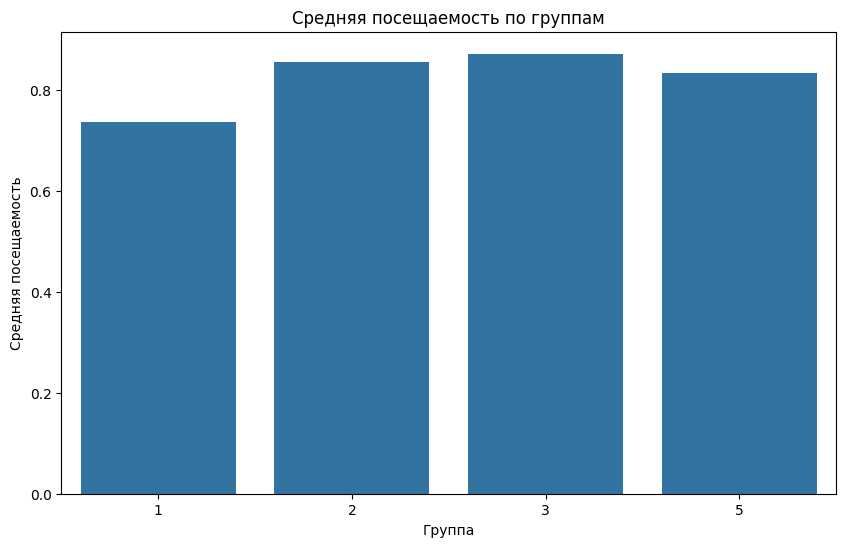

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='group_ids', y='is_attend', data=attendance_by_group)
plt.title('Средняя посещаемость по группам')
plt.xlabel('Группа')
plt.ylabel('Средняя посещаемость')
plt.show()

In [9]:
attendance_by_teacher = data.groupby('teacher_ids')['is_attend'].mean().reset_index()

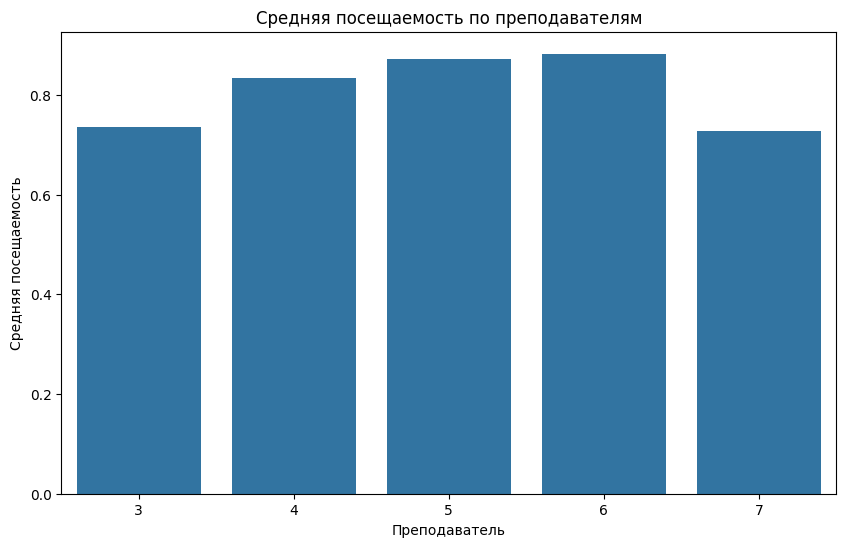

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='teacher_ids', y='is_attend', data=attendance_by_teacher)
plt.title('Средняя посещаемость по преподавателям')
plt.xlabel('Преподаватель')
plt.ylabel('Средняя посещаемость')
plt.show()

In [13]:
daily_attendance = data.groupby('event_date')['is_attend'].mean().reset_index()

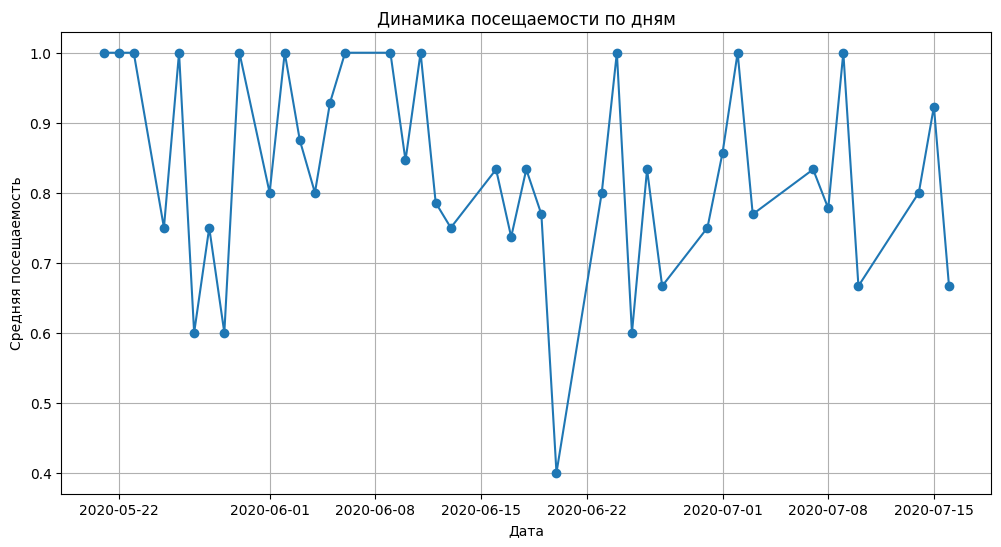

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(daily_attendance['event_date'], daily_attendance['is_attend'], marker='o', linestyle='-')
plt.title('Динамика посещаемости по дням')
plt.xlabel('Дата')
plt.ylabel('Средняя посещаемость')
plt.grid(True)
plt.show()

In [14]:
attendance_by_group_teacher = data.groupby(['group_ids', 'teacher_ids'])['is_attend'].mean().unstack()

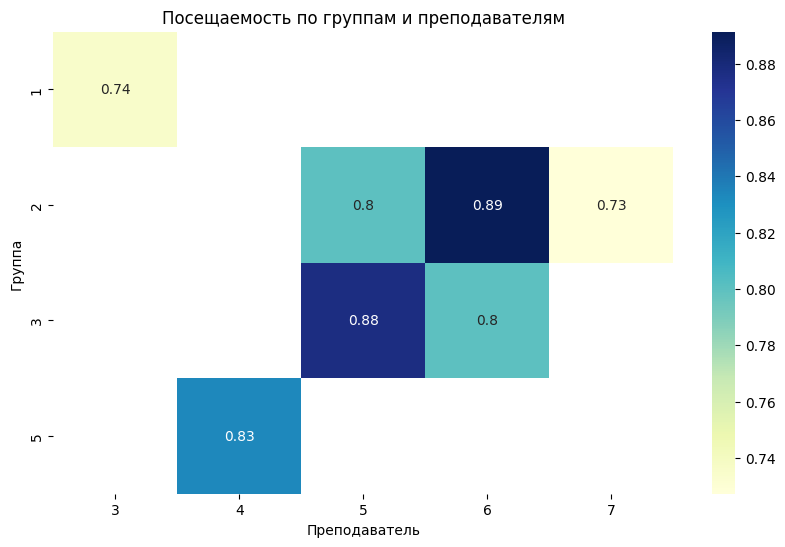

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(attendance_by_group_teacher, annot=True, cmap='YlGnBu')
plt.title('Посещаемость по группам и преподавателям')
plt.xlabel('Преподаватель')
plt.ylabel('Группа')
plt.show()

In [16]:
attendance_counts = data['is_attend'].value_counts()

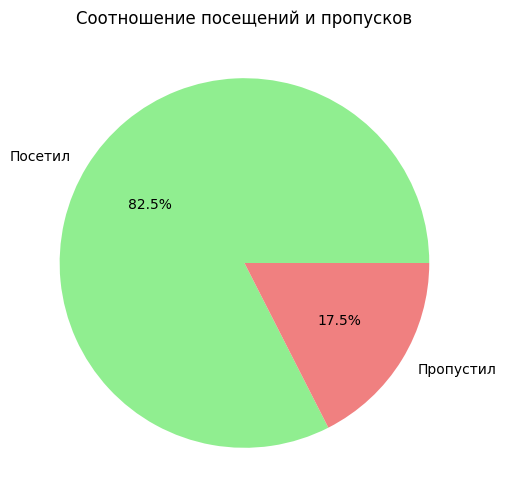

In [17]:
plt.figure(figsize=(6, 6))
plt.pie(attendance_counts, labels=['Посетил', 'Пропустил'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Соотношение посещений и пропусков')
plt.show()

<ipython-input-18-5e5e3633833f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_attend', y='customer_id', data=top_10_active, palette='viridis')
<ipython-input-18-5e5e3633833f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_attend', y='customer_id', data=top_10_inactive, palette='magma')


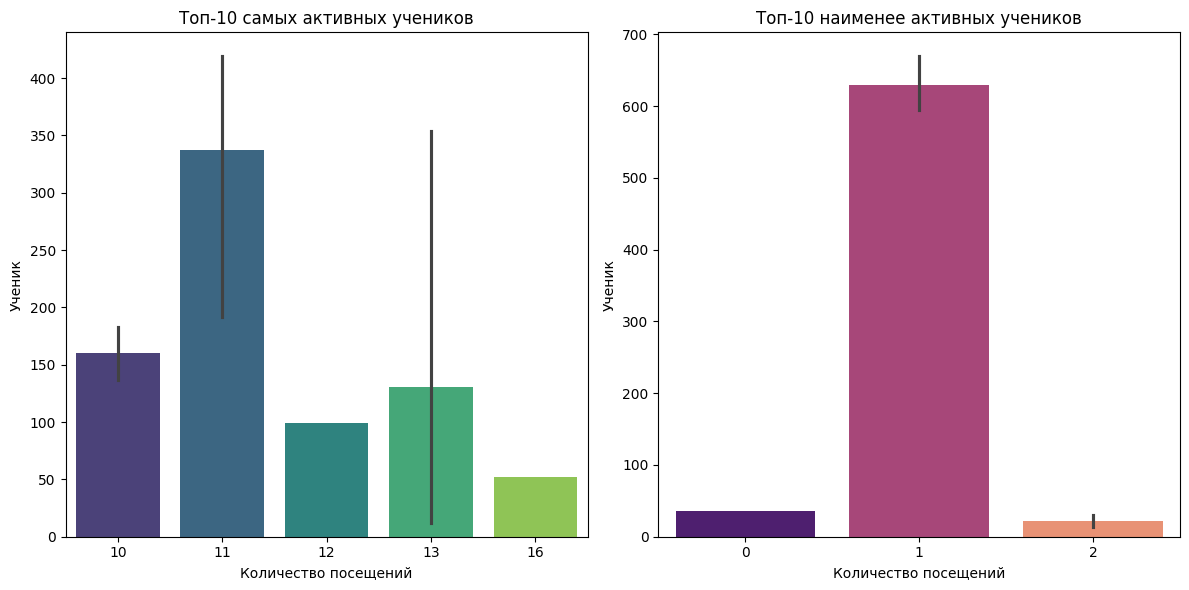

In [18]:
top_10_active = data.groupby('customer_id')['is_attend'].sum().nlargest(10).reset_index()

# Топ-10 наименее активных учеников
top_10_inactive = data.groupby('customer_id')['is_attend'].sum().nsmallest(10).reset_index()

# Визуализация
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='is_attend', y='customer_id', data=top_10_active, palette='viridis')
plt.title('Топ-10 самых активных учеников')
plt.xlabel('Количество посещений')
plt.ylabel('Ученик')

plt.subplot(1, 2, 2)
sns.barplot(x='is_attend', y='customer_id', data=top_10_inactive, palette='magma')
plt.title('Топ-10 наименее активных учеников')
plt.xlabel('Количество посещений')
plt.ylabel('Ученик')

plt.tight_layout()
plt.show()